In [904]:
import requests
import json
from DbConn import *
from datetime import datetime, timedelta

def week_dataframe():
    db = DbConn()
    
    select_query = """
    select moviecd, max(movienm), avg(mrank), min(mrank), avg(salesamt), max(salesamt), avg(salesshare),max(salesshare),avg(audicnt), max(audicnt), avg(scrncnt), max(scrncnt), avg(showcnt), max(showcnt), max(salesacc),max(audiacc) 
    from boxoffice  
    where  opendt +13 >= dailydate2 and dailydate2 < '19/01/01'
    group by moviecd
    order by moviecd
    """
    select_result = db.execute(select_query)

    print("첫주 작업 완료. -----")
    db.disconnect()
    return  select_result


def max_dataframe():
    db = DbConn()
    
    select_query = """
    select moviecd, max(salesacc), max(audiacc)
    from boxoffice 
    group by moviecd
    order by moviecd
    """
    select_result = db.execute(select_query)

    print("누적 작업 완료. -----")
    db.disconnect()
    return  select_result

# print(week_dataframe())

print(max_dataframe())


누적 작업 완료. -----
[(19720061, 55326000, 9528), (19818004, 294463100, 44957), (19880001, 1275551830, 155441), (19890291, 125812200, 16098), (19900204, 250489400, 32443), (19900335, 62523200, 14097), (19910247, 112498060, 11743), (19950327, 59175000, 7725), (19960126, 233394100, 28794), (19970099, 173160500, 23198), (19980074, 4663487000, 394492), (19990050, 39827000, 4299), (19990140, 809673200, 119841), (19990220, 459695282, 55691), (19990303, 44676900, 5860), (20000067, 684830792, 89842), (20010238, 31657500, 4073), (20010291, 2349913000, 267950), (20020168, 890056600, 113393), (20020186, 253277131, 32606), (20020222, 876556000, 102596), (20030003, 87607800, 12271), (20030404, 2137939308, 306422), (20040525, 5477068500, 859337), (20040526, 1400964800, 207791), (20040695, 6630425300, 999064), (20040734, 4159207700, 596592), (20040756, 16416755217, 2603943), (20041524, 441040000, 61917), (20050082, 3564500200, 469971), (20060127, 102955200, 12800), (20060204, 1001836600, 171733), (2006034

In [905]:
import pandas as pd

df_week_column_name = ['mnumber', 'mname','avg_rank', 'min_rank', 'avg_dsales','max_dsales',
                       'avg_dshare','max_dshare', 
                       'avg_dpeople','max_dpeople', 'avg_dscreen','max_dscreen',
                       'avg_dview','max_dview', 'sum_dsales','sum_dpeople']
df_week = pd.DataFrame(week_dataframe(), columns=df_week_column_name)
df_week.tail()


첫주 작업 완료. -----


,mnumber,mname,avg_rank,min_rank,avg_dsales,max_dsales,avg_dshare,max_dshare,avg_dpeople,max_dpeople,avg_dscreen,max_dscreen,avg_dview,max_dview,sum_dsales,sum_dpeople
1226,20189843,호두까기 인형과 4개의 왕국,4.615385,4,2.737473e+08,709451500,5.715385,8.1,33308.153846,82644,252.153846,294,971.384615,1320,3564978700,433779
1227,20189861,더 포스트,8.818182,8,7.436848e+07,146777400,2.009091,3.0,9399.636364,17818,221.000000,281,454.636364,614,885763000,111760
1228,20189869,해피 투게더,9.600000,9,1.594329e+07,21806500,0.460000,0.6,2160.000000,3191,169.400000,240,244.400000,373,167657850,20989
1229,20189882,반딧불이 딘딘,9.000000,9,3.380510e+07,36414800,1.600000,1.7,5105.000000,5494,272.000000,274,332.000000,335,205918800,29414
1230,20189901,더 포리너,9.750000,9,3.956412e+07,63424700,2.025000,3.9,4963.250000,8178,150.750000,156,462.000000,547,292696700,35694


In [906]:
df_max_column_name = ['mnumber', 'sum_total_sales','sum_total_people']
df_max = pd.DataFrame(max_dataframe(), columns=df_max_column_name )
df_max.tail()

누적 작업 완료. -----


,mnumber,sum_total_sales,sum_total_people
1548,20199949,71190540,8991
1549,20199950,45266432110,5234641
1550,20199951,3906858030,471266
1551,20199954,18954490,8491
1552,20199981,1044574960,143853


In [907]:
df = pd.merge(df_week,df_max, on='mnumber')
df.tail()

,mnumber,mname,avg_rank,min_rank,avg_dsales,max_dsales,avg_dshare,max_dshare,avg_dpeople,max_dpeople,avg_dscreen,max_dscreen,avg_dview,max_dview,sum_dsales,sum_dpeople,sum_total_sales,sum_total_people
1226,20189843,호두까기 인형과 4개의 왕국,4.615385,4,2.737473e+08,709451500,5.715385,8.1,33308.153846,82644,252.153846,294,971.384615,1320,3564978700,433779,3893958100,481315
1227,20189861,더 포스트,8.818182,8,7.436848e+07,146777400,2.009091,3.0,9399.636364,17818,221.000000,281,454.636364,614,885763000,111760,885763000,111760
1228,20189869,해피 투게더,9.600000,9,1.594329e+07,21806500,0.460000,0.6,2160.000000,3191,169.400000,240,244.400000,373,167657850,20989,167657850,20989
1229,20189882,반딧불이 딘딘,9.000000,9,3.380510e+07,36414800,1.600000,1.7,5105.000000,5494,272.000000,274,332.000000,335,205918800,29414,205918800,29414
1230,20189901,더 포리너,9.750000,9,3.956412e+07,63424700,2.025000,3.9,4963.250000,8178,150.750000,156,462.000000,547,292696700,35694,292696700,35694


In [908]:
score_list = []
for i in df['sum_total_people']:
    if i >= 3000000:
        score_list.append('A')
    elif i >= 1000000:
        score_list.append('B')
    elif i >= 300000:
        score_list.append('C')
    elif i >= 50000:
        score_list.append('D')
    elif i >= 10000:
        score_list.append('E')
    else :
        score_list.append('F')

        
df['score'] = score_list
df['score'].head()

0    D
1    C
2    D
3    D
4    A
Name: score, dtype: object

In [909]:
df.groupby('score').count()

,mnumber,mname,avg_rank,min_rank,avg_dsales,max_dsales,avg_dshare,max_dshare,avg_dpeople,max_dpeople,avg_dscreen,max_dscreen,avg_dview,max_dview,sum_dsales,sum_dpeople,sum_total_sales,sum_total_people
score,,,,,,,,,,,,,,,,,,
A,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102
B,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152
C,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213
D,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347
E,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309
F,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108


In [910]:
X = df.drop(['mnumber', 'mname','sum_total_sales','sum_total_people','score'], axis=1)
X.tail()

,avg_rank,min_rank,avg_dsales,max_dsales,avg_dshare,max_dshare,avg_dpeople,max_dpeople,avg_dscreen,max_dscreen,avg_dview,max_dview,sum_dsales,sum_dpeople
1226,4.615385,4,2.737473e+08,709451500,5.715385,8.1,33308.153846,82644,252.153846,294,971.384615,1320,3564978700,433779
1227,8.818182,8,7.436848e+07,146777400,2.009091,3.0,9399.636364,17818,221.000000,281,454.636364,614,885763000,111760
1228,9.600000,9,1.594329e+07,21806500,0.460000,0.6,2160.000000,3191,169.400000,240,244.400000,373,167657850,20989
1229,9.000000,9,3.380510e+07,36414800,1.600000,1.7,5105.000000,5494,272.000000,274,332.000000,335,205918800,29414
1230,9.750000,9,3.956412e+07,63424700,2.025000,3.9,4963.250000,8178,150.750000,156,462.000000,547,292696700,35694


In [911]:
Y=df['score']

In [912]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# train, test 7:3
X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                                   test_size=0.3, random_state=999)

In [913]:
model = RandomForestClassifier(n_estimators=10, random_state=999)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=999, verbose=0, warm_start=False)

In [914]:
model.score(X_train,y_train)

0.9930313588850174

In [915]:
model.score(X_test,y_test)

0.9243243243243243

In [916]:
# cunfuse matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

conMat = pd.DataFrame(confusion_matrix(y_test,y_pred),
                         index=['True[A]', 'True[B]', 'True[C]', 'True[D]', 'True[E]', 'True[F]'],
                         columns=['Pred[A]', 'Pred[B]', 'Pred[C]', 'Pred[D]', 'Pred[E]', 'Pred[F]'])

 # 정확도, precision, recall, f1
conMat

,Pred[A],Pred[B],Pred[C],Pred[D],Pred[E],Pred[F]
True[A],24,3,1,0,0,0
True[B],6,45,0,0,0,0
True[C],0,5,51,7,0,0
True[D],0,0,2,95,1,0
True[E],0,0,0,1,95,1
True[F],0,0,0,0,1,32


In [917]:
feat_labels = X.columns
feat_labels

Index(['avg_rank', 'min_rank', 'avg_dsales', 'max_dsales', 'avg_dshare',
       'max_dshare', 'avg_dpeople', 'max_dpeople', 'avg_dscreen',
       'max_dscreen', 'avg_dview', 'max_dview', 'sum_dsales', 'sum_dpeople'],
      dtype='object')

 1) max_dshare                     0.033323
 2) sum_dsales                     0.168244
 3) max_dsales                     0.072924
 4) avg_dsales                     0.118276
 5) avg_dshare                     0.031996
 6) sum_dpeople                    0.337757
 7) max_dscreen                    0.015459
 8) avg_dscreen                    0.007589
 9) avg_dview                      0.012718
10) avg_dpeople                    0.082632
11) max_dpeople                    0.076645
12) max_dview                      0.015220
13) min_rank                       0.009085
14) avg_rank                       0.018133


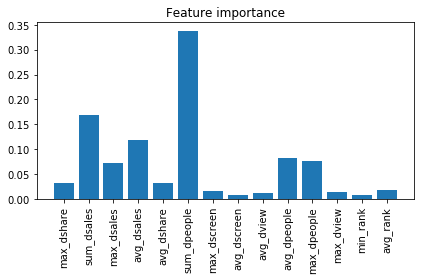

In [889]:
importances = model.feature_importances_
indices = np.argsort(importances[::-1])
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f"%(f+1,30,feat_labels[indices[f]],
                         importances[indices[f]]))
plt.title('Feature importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.tight_layout()
plt.show()